(450, 423, 3)


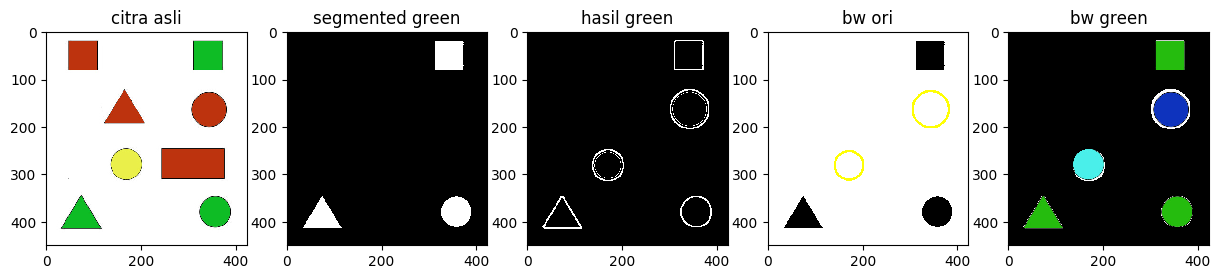

In [223]:
import numpy as np;
import cv2;

from matplotlib import pyplot as plt
def tampil_plot(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def figure():
    return plt.figure(num=None, figsize=(15, 20), dpi=100)

img = cv2.imread('uts.jpg',1)
rgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# np.array([red,green,blue])

lower_green = np.array([0,100,0])
upper_green = np.array([80,255,100])

# lower_blue = np.array([50,50,200])
# upper_blue = np.array([100,150,255])

mask1 = cv2.inRange(rgb, lower_green, upper_green)

    # masking object
result = np.zeros(rgb.shape, dtype='uint8')
result[mask1 > 0, :] = rgb[mask1 > 0, :]
cv2.imwrite('hijau.jpg',result)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, im_th = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV);

cimg = cv2.cvtColor(mask1,cv2.COLOR_RGB2BGR)
circles = cv2.HoughCircles(im_th,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(250,0,0),3)
# inv_edges = im_th ~ masknya
# huhu = masknya[~im_th]=0
inv_cimg = cv2.bitwise_not(cimg)

inv_edges = cv2.bitwise_not(masknya)
retval = cv2.floodFill(inv_edges, None,None, (0, 0), 0)
mask = cv2.bitwise_or(masknya, mask1)
 
    # masking object
hasile = np.zeros(rgb.shape, dtype='uint8')
hasile[mask > 0, :] = rgb[mask > 0, :]
# hasile = cv2.bitwise_not(hasile)
# huhu = im_th * maskz

# np.reshape(im_th,(450, 423,3))
# print(huhu.shape)

# inv_edges = cv2.bitwise_and(inv_edges , im_th)
# th, im_th = cv2.threshold(cimg, 220, 255, cv2.THRESH_BINARY_INV);
# # Copy the thresholded image.
# im_floodfill = im_th.copy()

# # Mask used to flood filling.
# # Notice the size needs to be 2 pixels than the image.
# h, w = im_th.shape[:2]
# mask = np.zeros((h+2, w+2), np.uint8)
# # Floodfill from point (0, 0)
# cv2.floodFill(im_floodfill, mask, (0,0), 255);

# # Invert floodfilled image

# # Combine the two images to get the foreground.


# # Floodfill from point (0, 0)
# cv2.floodFill(im_floodfill, mask, (0,0), 255);
# edges = cv2.Canny(cimg, 20, 60) 
hu = cv2.cvtColor(mask1,cv2.COLOR_RGB2BGR)
print(hu.shape)
cimgs = cv2.Canny(cimg, 40, 80)
contours, _ = cv2.findContours(cimgs, mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_SIMPLE)
 # compute object mask
    
# inv_cimg = cv2.bitwise_not(cimgs)

cv2.drawContours(cimgs, contours, -1, 255, 2)
inv_edgess = cv2.bitwise_not(cimgs)
cv2.floodFill(inv_edgess, None, (200, 200), 0)
masks = cv2.bitwise_or(cimgs, inv_edgess)
 
    # masking object
result2 = np.zeros(rgb.shape, dtype='uint8')
result2[masks > 0, :] = rgb[masks > 0, :]


    
#     # compute object mask
# haha = cv2.drawContours(cimg, contours, -1, 255, 2)
# inv_edges = cv2.bitwise_not(cimg)
# retval = cv2.floodFill(inv_edges, None,None, (0, 0), 0)
# mask = cv2.bitwise_or(cimg, inv_edges)

figure()
plt.subplot(1, 5, 1), plt.imshow(rgb), plt.title('citra asli')
plt.subplot(1, 5, 2), plt.imshow(tampil_plot(mask1)), plt.title('segmented green')
plt.subplot(1, 5, 3), plt.imshow(tampil_plot(cimgs)), plt.title('hasil green')
plt.subplot(1, 5, 4), plt.imshow(tampil_plot(inv_cimg)), plt.title('bw ori')
plt.subplot(1, 5, 5), plt.imshow(tampil_plot(result2)), plt.title('bw green')

plt.show()